In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats


In [3]:
profile = pd.read_csv("/Users/radiahkhan/Documents/OkCupid Dataset Analysis/profiles_revised 2.csv")
profile_df = pd.DataFrame(profile)
profile_df.head()




age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   36         average       mostly other     often  sometimes   
2   37            thin           anything  socially        NaN   
3   22            thin         vegetarian  socially        NaN   
4   30        athletic                NaN  socially      never   

                           education            ethnicity  height  income  \
0      working on college/university         asian, white    75.0      -1   
1              working on space camp                white    70.0   80000   
2     graduated from masters program                  NaN    68.0      -1   
3      working on college/university                white    71.0   20000   
4  graduated from college/university  asian, black, other    66.0      -1   

                           job                                     offspring  \
0               transportation  doesn&rsquo;t have kids, but might want them   
1         hospitality / travel  doesn&rsquo;t have kids, but might want them   
2                          NaN                                           NaN   
3                      student                       doesn&rsquo;t want kids   
4  artistic / musical / writer                                           NaN   

  orientation                       pets  \
0    straight  likes dogs and likes cats   
1    straight  likes dogs and likes cats   
2    straight                   has cats   
3    straight                 likes cats   
4    straight  likes dogs and likes cats   

                                   religion sex  \
0     agnosticism and very serious about it   m   
1  agnosticism but not too serious about it   m   
2                                       NaN   m   
3                                       NaN   m   
4                                       NaN   m   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks     status  
0                                            english     single  
1  english (fluently), spanish (poorly), french (...     single  
2                               english, french, c++  available  
3                           english, german (poorly)     single  
4                                            english     single

In [98]:
#Exploratory Data Analysis 
# Ethnicity 
profile_df[["first_ethnicity", "second_ethnicity", "third_ethnicity"]] = (
    profile_df["ethnicity"].str.split(",",n=2, expand=True)
)

profile_df["ethnicity_count"] = profile_df[["first_ethnicity", "second_ethnicity", "third_ethnicity"]].notna().sum(axis=1) #axis = 1 checks across column that is why. And we dropped the NA values here
profile_df["multi_ethnicity"] = profile_df["ethnicity_count"].apply(lambda x: "Yes" if x > 1 else "No") 
mask_ethnicity = profile_df["ethnicity_count"] != 0
filtered_df_ethnicity = profile_df[mask_ethnicity]
filtered_df_ethnicity


age       body_type               diet      drinks      drugs  \
0       22  a little extra  strictly anything    socially      never   
1       36         average       mostly other       often  sometimes   
3       22            thin         vegetarian    socially        NaN   
4       30        athletic                NaN    socially      never   
5       28         average    mostly anything    socially        NaN   
...    ...             ...                ...         ...        ...   
59940   32             NaN                NaN    socially      never   
59942   24             fit    mostly anything       often  sometimes   
59943   41         average    mostly anything  not at all      never   
59944   26        athletic    mostly anything    socially      often   
59945   40         average                NaN    socially        NaN   

                               education            ethnicity  height  income  \
0          working on college/university         asian, white    75.0      -1   
1                  working on space camp                white    70.0   80000   
3          working on college/university                white    71.0   20000   
4      graduated from college/university  asian, black, other    66.0      -1   
5      graduated from college/university                white    67.0      -1   
...                                  ...                  ...     ...     ...   
59940         working on masters program       middle eastern    62.0      -1   
59942      working on college/university         white, other    72.0      -1   
59943     graduated from masters program                asian    71.0  100000   
59944      working on college/university         asian, black    73.0      -1   
59945     graduated from masters program                white    68.0      -1   

                                  job  ... sex  \
0                      transportation  ...   m   
1                hospitality / travel  ...   m   
3                             student  ...   m   
4         artistic / musical / writer  ...   m   
5      computer / hardware / software  ...   m   
...                               ...  ...  ..   
59940                             NaN  ...   f   
59942           entertainment / media  ...   m   
59943    construction / craftsmanship  ...   m   
59944               medicine / health  ...   m   
59945               medicine / health  ...   m   

                                           sign          smokes  \
0                                        gemini       sometimes   
1                                        cancer              no   
3                                        pisces              no   
4                                      aquarius              no   
5                                        taurus              no   
...                                         ...             ...   
59940                               sagittarius              no   
59942           leo but it doesn&rsquo;t matter              no   
59943   sagittarius but it doesn&rsquo;t matter              no   
59944     leo and it&rsquo;s fun to think about  trying to quit   
59945  gemini and it&rsquo;s fun to think about       sometimes   

                                                  speaks  status  \
0                                                english  single   
1      english (fluently), spanish (poorly), french (...  single   
3                               english, german (poorly)  single   
4                                                english  single   
5                     english (fluently), chinese (okay)  single   
...                                                  ...     ...   
59940                  english (fluently), french, farsi  single   
59942                                 english (fluently)  single   
59943                                 english (fluently)  single   
59944  english (fluently), spanish (poorly), chinese ...  single   
59945          

/var/folders/dv/nxg3knns5hbg0mbh8p2pqwfw0000gn/T/ipykernel_1396/1362049763.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot_count_ethnicity_1 = sns.histplot(


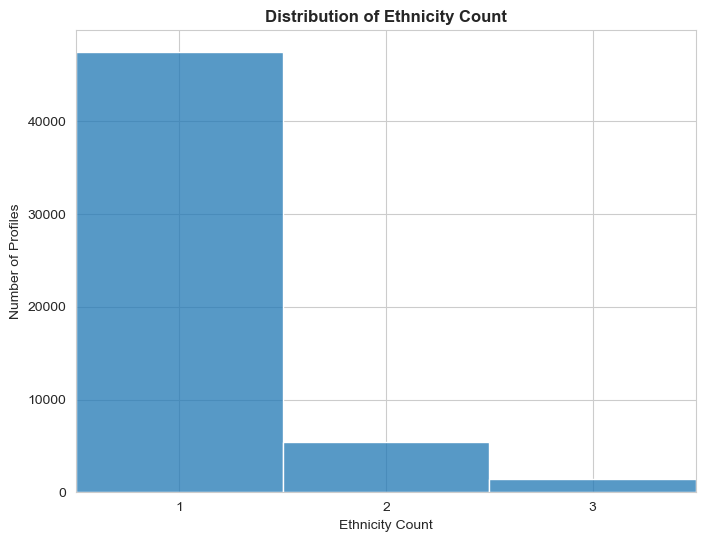

In [ ]:
#Plotting ethnicity count 

plt.figure(figsize=(8,6))

plot_count_ethnicity_1 = sns.histplot(
    data=filtered_df_ethnicity,
    x="ethnicity_count",
    stat="count",
     bins=[0.5, 1.5, 2.5, 3.5],
    palette="viridis"  
)
plt.title("Distribution of Ethnicity Count",fontweight = 'bold')
plt.xlabel("Ethnicity Count")
plt.ylabel("Number of Profiles")
plt.xticks([1,2,3]) 
plt.xlim(0.5,3.5) 
plt.show()

In [ ]:
#Distribution of ethnicity to test racial bias 
#Given there is low rate of third race we are removing it for now 
mask_ethnicity_2 = profile_df["first_ethnicity"].notna() & profile_df["second_ethnicity"].notna() 
filtered_df_ethnicity_2 = profile_df[mask_ethnicity_2]
filtered_df_ethnicity_2 = filtered_df_ethnicity_2[["sex", "first_ethnicity", "second_ethnicity"]]
filtered_df_ethnicity_2["first_ethnicity"] = filtered_df_ethnicity_2["first_ethnicity"].str.strip()
filtered_df_ethnicity_2["second_ethnicity"] = (filtered_df_ethnicity_2["second_ethnicity"].str.strip())


In [215]:
melted_ethnicity = filtered_df_ethnicity_2.melt(
    id_vars = "sex",
    value_vars = [ "first_ethnicity", "second_ethnicity"],
    var_name = "ethnicity",
    value_name = "count"
)
melted_ethnicity["count"].str.strip()
melted_ethnicity = melted_ethnicity.dropna(subset=["ethnicity"])
melted_ethnicity

sex         ethnicity             count
0       m   first_ethnicity             asian
1       m   first_ethnicity             asian
2       f   first_ethnicity             white
3       f   first_ethnicity  hispanic / latin
4       m   first_ethnicity             asian
...    ..               ...               ...
13713   f  second_ethnicity  hispanic / latin
13714   m  second_ethnicity   native american
13715   m  second_ethnicity  hispanic / latin
13716   m  second_ethnicity             other
13717   m  second_ethnicity             black

[13718 rows x 3 columns]

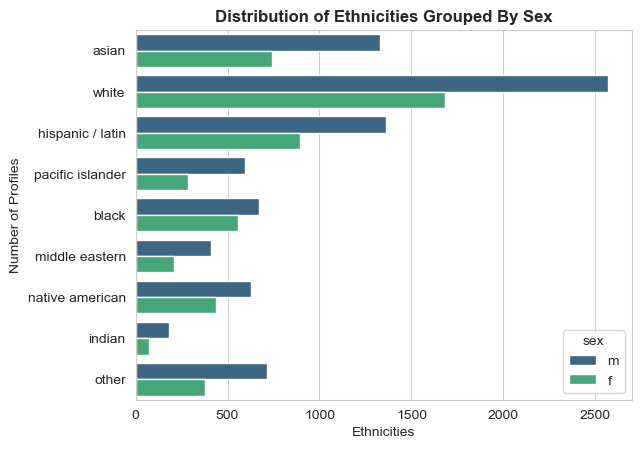

In [220]:
sns.countplot(data=melted_ethnicity, y="count", hue="sex", palette="viridis")
plt.title("Distribution of Ethnicities Grouped By Sex",fontweight = 'bold')
plt.xlabel("Ethnicities")
plt.ylabel("Number of Profiles")

plt.show()



Data Bias 
More data about the white population
Limitation


## Bodytype and sex 
Grouping by sex and counting body type 
Then we can connect it to race 

In [221]:
body_sex_summary = profile_df[["sex", "body_type"]]
body_sex_summary.dropna()

sex       body_type
0       m  a little extra
1       m         average
2       m            thin
3       m            thin
4       m        athletic
...    ..             ...
59938   m         average
59942   m             fit
59943   m         average
59944   m        athletic
59945   m         average

[54650 rows x 2 columns]

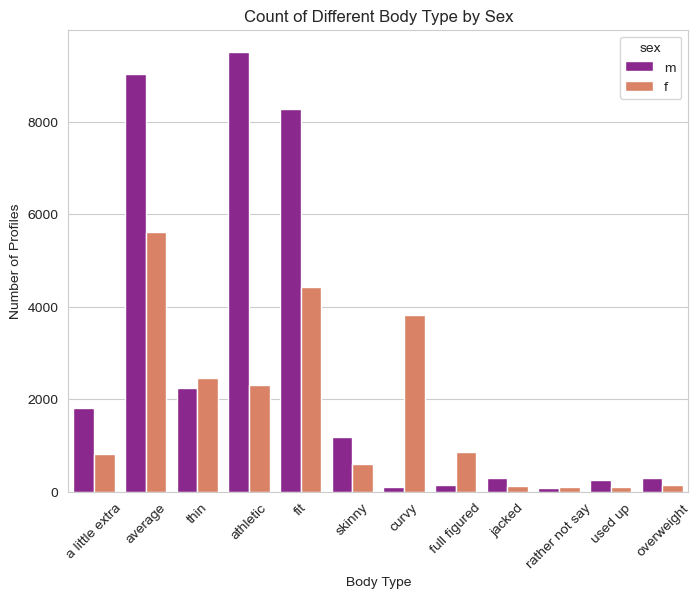

In [125]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=body_sex_summary,
    x="body_type",
    hue="sex",
    palette="plasma")
plt.title("Count of Different Body Type by Sex")
plt.xlabel("Body Type")
plt.ylabel("Number of Profiles")
plt.xticks(rotation=45)
plt.show()

In [126]:
education_df = 
profile_df['education'] = profile_df['education'].str.replace('bachelors degree', 'bachelors', case=False)

SyntaxError: invalid syntax (3249902948.py, line 1)

In [272]:
mapping = {
    'working on college/university': "Undergraduate (Bachelor's)",
    'working on space camp': 'Outside',
    'graduated from masters program': 'Postgraduate',
    'working on two-year college': 'Undergraduate (Associate)',
    'nan': 'Not given',
    'graduated from high school': 'High School',
    'working on masters program': 'Postgraduate',
    'graduated from space camp': 'Outside',
    'college/university': 'Undergraduate',
    'dropped out of space camp': 'Outside', 
    'graduated from ph.d program': 'Postgraduate',
    'graduated from law school': 'Postgraduate',
    'working on ph.d program': 'Postgraduate',
    'two-year college': 'Undergraduate (Associate)',
    'graduated from two-year college': 'Undergraduate (Associate)',
    'working on med school': 'Postgraduate',
    'dropped out of college/university': 'College Dropout',
    'space camp': 'Outside',
    'graduated from med school': 'Postgraduate',
    'dropped out of high school': 'High School Dropout',
    'working on high school': 'High School',
    'masters program': 'Postgraduate',
    'dropped out of ph.d program': "Undergraduate (Bachelor's)",
    'dropped out of two-year college': 'College Dropout',
    'dropped out of med school': "Undergraduate (Bachelor's)",
    'high school': 'High School',
    'working on law school': 'Postgraduate',
    'law school': 'Postgraduate',
    'dropped out of masters program': "Undergraduate (Bachelor's)",
    'ph.d program': 'Postgraduate',
    'dropped out of law school': "Undergraduate (Bachelor's)",
    'med school': 'Postgraduate',
    'Undergraduate' : "Undergraduate (Bachelor's)",
     'graduated from college/university' : "Undergraduate (Bachelor's)",
    'Undergraduate' : "Undergraduate (Bachelor's)"
     
}


In [ ]:
profile_df["education_group"] = ( profile_df["education"].str.strip().replace(mapping))
profile_df

age       body_type               diet      drinks      drugs  \
0       22  a little extra  strictly anything    socially      never   
1       36         average       mostly other       often  sometimes   
2       37            thin           anything    socially        NaN   
3       22            thin         vegetarian    socially        NaN   
4       30        athletic                NaN    socially      never   
...    ...             ...                ...         ...        ...   
59941   60             NaN                NaN    socially      never   
59942   24             fit    mostly anything       often  sometimes   
59943   41         average    mostly anything  not at all      never   
59944   26        athletic    mostly anything    socially      often   
59945   40         average                NaN    socially        NaN   

                               education            ethnicity  height  income  \
0          working on college/university         asian, white    75.0      -1   
1                  working on space camp                white    70.0   80000   
2         graduated from masters program                  NaN    68.0      -1   
3          working on college/university                white    71.0   20000   
4      graduated from college/university  asian, black, other    66.0      -1   
...                                  ...                  ...     ...     ...   
59941  graduated from college/university                  NaN    62.0      -1   
59942      working on college/university         white, other    72.0      -1   
59943     graduated from masters program                asian    71.0  100000   
59944      working on college/university         asian, black    73.0      -1   
59945     graduated from masters program                white    68.0      -1   

                                job  ...  \
0                    transportation  ...   
1              hospitality / travel  ...   
2                               NaN  ...   
3                           student  ...   
4       artistic / musical / writer  ...   
...                             ...  ...   
59941   sales / marketing / biz dev  ...   
59942         entertainment / media  ...   
59943  construction / craftsmanship  ...   
59944             medicine / health  ...   
59945             medicine / health  ...   

                                           sign          smokes  \
0                                        gemini       sometimes   
1                                        cancer              no   
2            pisces but it doesn&rsquo;t matter              no   
3                                        pisces              no   
4                                      aquarius              no   
...                                         ...             ...   
59941  cancer and it&rsquo;s fun to think about              no   
59942           leo but it doesn&rsquo;t matter              no   
59943   sagittarius but it doesn&rsquo;t matter              no   
59944     leo and it&rsquo;s fun to think about  trying to quit   
59945  gemini and it&rsquo;s fun to think about       sometimes   

                                                  speaks     status  \
0                                                english     single   
1      english (fluently), spanish (poorly), french (...     single   
2                                   english, french, c++  available   
3                               english, german (poorly)     single   
4                                                english     single   
...                                                  ...        ...   
59941                                            english     single   
59942                                 english (fluently)     single   
59943                                 english (fluently)     single   
59944  english (fluently), spanish (poorly), chinese ...     single   
59945                                            engli

In [274]:
filtered_education = profile_df[profile_df["education_group"] != "Outside"]
filtered_education.dropna 
filtered_education

age       body_type               diet      drinks      drugs  \
0       22  a little extra  strictly anything    socially      never   
2       37            thin           anything    socially        NaN   
3       22            thin         vegetarian    socially        NaN   
4       30        athletic                NaN    socially      never   
5       28         average    mostly anything    socially        NaN   
...    ...             ...                ...         ...        ...   
59941   60             NaN                NaN    socially      never   
59942   24             fit    mostly anything       often  sometimes   
59943   41         average    mostly anything  not at all      never   
59944   26        athletic    mostly anything    socially      often   
59945   40         average                NaN    socially        NaN   

                               education            ethnicity  height  income  \
0          working on college/university         asian, white    75.0      -1   
2         graduated from masters program                  NaN    68.0      -1   
3          working on college/university                white    71.0   20000   
4      graduated from college/university  asian, black, other    66.0      -1   
5      graduated from college/university                white    67.0      -1   
...                                  ...                  ...     ...     ...   
59941  graduated from college/university                  NaN    62.0      -1   
59942      working on college/university         white, other    72.0      -1   
59943     graduated from masters program                asian    71.0  100000   
59944      working on college/university         asian, black    73.0      -1   
59945     graduated from masters program                white    68.0      -1   

                                  job  ...  \
0                      transportation  ...   
2                                 NaN  ...   
3                             student  ...   
4         artistic / musical / writer  ...   
5      computer / hardware / software  ...   
...                               ...  ...   
59941     sales / marketing / biz dev  ...   
59942           entertainment / media  ...   
59943    construction / craftsmanship  ...   
59944               medicine / health  ...   
59945               medicine / health  ...   

                                           sign          smokes  \
0                                        gemini       sometimes   
2            pisces but it doesn&rsquo;t matter              no   
3                                        pisces              no   
4                                      aquarius              no   
5                                        taurus              no   
...                                         ...             ...   
59941  cancer and it&rsquo;s fun to think about              no   
59942           leo but it doesn&rsquo;t matter              no   
59943   sagittarius but it doesn&rsquo;t matter              no   
59944     leo and it&rsquo;s fun to think about  trying to quit   
59945  gemini and it&rsquo;s fun to think about       sometimes   

                                                  speaks     status  \
0                                                english     single   
2                                   english, french, c++  available   
3                               english, german (poorly)     single   
4                                                english     single   
5                     english (fluently), chinese (okay)     single   
...                                                  ...        ...   
59941                                            english     single   
59942                                 english (fluently)     single   
59943                                 english (fluently)     single   
59944  english (fluently), spanish (poorly), chinese ...     single   
59945                         

In [279]:
mapping_2 = { 'Undergraduate': "Undergraduate (Bachelor's)"}
filtered_education["education_group"] = ( filtered_education["education_group"].str.strip().replace(mapping))



/var/folders/dv/nxg3knns5hbg0mbh8p2pqwfw0000gn/T/ipykernel_1396/4060299921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_education["education_group"] = ( filtered_education["education_group"].str.strip().replace(mapping))


In [280]:
filtered_education["education_group"].unique()

array(["Undergraduate (Bachelor's)", 'Postgraduate',
       'Undergraduate (Associate)', nan, 'High School', 'College Dropout',
       'High School Dropout'], dtype=object)

In [281]:

#Distribution of education level among male and female 
filtered_education_summary = filtered_education[["education_group", "sex"]]

In [288]:
cross_tab_ed_sex = pd.crosstab(filtered_education_summary['education_group'],
                               filtered_education_summary['sex'],
                               margins = True)
print(cross_tab_ed_sex)

sex                             f      m    All
education_group                                
College Dropout               272    914   1186
High School                   456   1155   1611
High School Dropout            21     81    102
Postgraduate                 6900   8240  15140
Undergraduate (Associate)     972   1855   2827
Undergraduate (Bachelor's)  12622  18147  30769
All                         21243  30392  51635


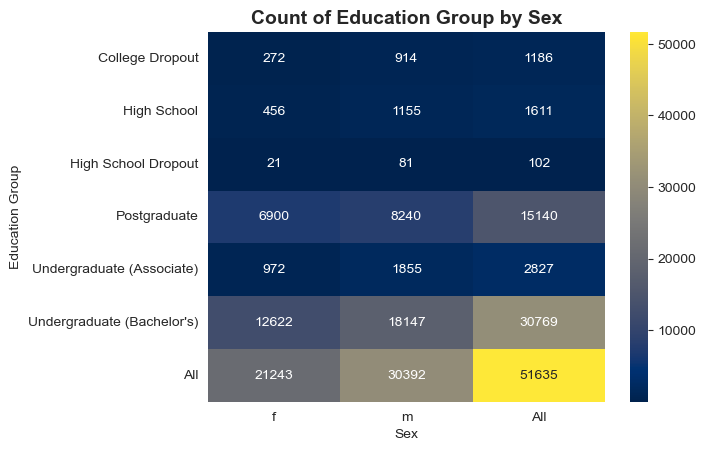

In [289]:


sns.heatmap(cross_tab_ed_sex, annot=True, fmt='d', cmap='cividis')
plt.title("Count of Education Group by Sex", fontsize=14, fontweight='bold')
plt.xlabel("Sex")
plt.ylabel("Education Group")
plt.show()


In [290]:
#Wait but is there any association between education level and people being on dating apps? 
#Test if there is any association between which sex is more likely to be 
stats.chi2_contingency(cross_tab_ed_sex)


Chi2ContingencyResult(statistic=np.float64(466.1600806007988), pvalue=np.float64(3.486143533108477e-92), dof=12, expected_freq=array([[4.87928692e+02, 6.98071308e+02, 1.18600000e+03],
       [6.62776663e+02, 9.48223337e+02, 1.61100000e+03],
       [4.19635131e+01, 6.00364869e+01, 1.02000000e+02],
       [6.22870185e+03, 8.91129815e+03, 1.51400000e+04],
       [1.16304756e+03, 1.66395244e+03, 2.82700000e+03],
       [1.26585817e+04, 1.81104183e+04, 3.07690000e+04],
       [2.12430000e+04, 3.03920000e+04, 5.16350000e+04]]))

In [ ]:
#Which age group is most there? 
